<a href="https://colab.research.google.com/github/josevargasmercado02/TareasCursos20B/blob/main/Taller3_MetMat1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import sympy as sp
from sympy import *
import mpmath as mp
import matplotlib.pyplot as plt
import numpy as np

Sección 2.4.5 Ejercicio 3

Inciso a.

In [52]:
x = sp.Symbol('x')
a, b = -1, 1

# Definimos el producto interno
def producto(f, g):
    return sp.integrate(sp.simplify(f * g), (x, a, b))

def base(n):
    return [x**k for k in range(n+1)]  # regresamos directamente la lista de polinomios

# Obtenemos la base
B = base(4)

# Verificar ortogonalidad
es_ortogonal = True
for i in range(len(B)):
    for j in range(i+1, len(B)):
        if producto(B[i], B[j]) != 0:
            es_ortogonal = False
            print(f"v{i} · v{j} = {producto(B[i], B[j])} (≠ 0)")

if es_ortogonal:
    print("La base es ortogonal")
else:
    print("La base NO es ortogonal")

B

v0 · v2 = 2/3 (≠ 0)
v0 · v4 = 2/5 (≠ 0)
v1 · v3 = 2/5 (≠ 0)
v2 · v4 = 2/7 (≠ 0)
La base NO es ortogonal


⎡       2   3   4⎤
⎣1, x, x , x , x ⎦

Inciso b.

In [56]:
x = sp.Symbol('x')
a, b = -1, 1

# Definimos el producto interno
def producto(f, g):
    return sp.integrate(sp.simplify(f * g), (x, a, b))

# Ortogonalización de Gram–Schmidt
def base_ort(n):
    base = [x**k for k in range(n+1)] # Definimos la base que queremos ortogonalizar
    ort = []
    for v in base:
        u = v
        for o in ort:
            u -= (producto(u, o) / producto(o, o)) * o
        ort.append(sp.simplify(u))
    return ort

# Mostramos el resultado hasta n = 10
ort = base_ort(10)

for i, p in enumerate(ort):
    print(f"p{i}(x) = ", p)
    print()


p0(x) =  1

p1(x) =  x

p2(x) =  x**2 - 1/3

p3(x) =  x*(x**2 - 3/5)

p4(x) =  x**4 - 6*x**2/7 + 3/35

p5(x) =  x*(63*x**4 - 70*x**2 + 15)/63

p6(x) =  x**6 - 15*x**4/11 + 5*x**2/11 - 5/231

p7(x) =  x*(429*x**6 - 693*x**4 + 315*x**2 - 35)/429

p8(x) =  x**8 - 28*x**6/15 + 14*x**4/13 - 28*x**2/143 + 7/1287

p9(x) =  x*(12155*x**8 - 25740*x**6 + 18018*x**4 - 4620*x**2 + 315)/12155

p10(x) =  x**10 - 45*x**8/19 + 630*x**6/323 - 210*x**4/323 + 315*x**2/4199 - 63/46189



Inciso c. (También es solución del ejercicio 6 de la sección 2.3.6)

In [116]:
t = sp.Symbol('t')
a, b = -1, 1
w = sp.sqrt(1 - t**2)

# Definimos el producto interno
def producto(f, g):
    return sp.integrate(sp.simplify(f * g * w), (t, a, b))

# Ortogonalización de Gram–Schmidt
def base_ort(n):
    base = [t**k for k in range(n+1)] # Definimos la base que queremos ortogonalizar
    ort = []
    for v in base:
        u = v
        for o in ort:
            u -= (producto(u, o) / producto(o, o)) * o
        ort.append(sp.simplify(u))
    return ort

# Mostramos el resultado hasta n = 10
ort = base_ort(10)

for i, p in enumerate(ort):
    print(f"p{i}(t) = ", p)
    print()


p0(t) =  1

p1(t) =  t

p2(t) =  t**2 - 1/4

p3(t) =  t**3 - t/2

p4(t) =  t**4 - 3*t**2/4 + 1/16

p5(t) =  t*(t**4 - t**2 + 3/16)

p6(t) =  t**6 - 5*t**4/4 + 3*t**2/8 - 1/64

p7(t) =  t*(16*t**6 - 24*t**4 + 10*t**2 - 1)/16

p8(t) =  t**8 - 7*t**6/4 + 15*t**4/16 - 5*t**2/32 + 1/256

p9(t) =  t*(256*t**8 - 512*t**6 + 336*t**4 - 80*t**2 + 5)/256

p10(t) =  t**10 - 9*t**8/4 + 7*t**6/4 - 35*t**4/64 + 15*t**2/256 - 1/1024



Inciso d.

Ejercicio I

In [152]:
x = sp.Symbol('x')
a, b = -1, 1
h = sp.sin(3*x) * (1 - x**2)

# Definimos el producto interno
def producto(f, g):
    integrando = sp.lambdify(x, f * g, "mpmath")
    return mp.quad(integrando, [a, b])

# Base de polinomios de Legendre
def base_ort(n):
    base = [x**k for k in range(n+1)]
    ort = []
    for v in base:
        u = v
        for o in ort:
            u -= (producto(u, o) / producto(o, o)) * o
        ort.append(sp.simplify(u))
    return ort
ort = base_ort(10)

# Base de monomios
def base_mon(n):
  monomios = [x**k for k in range(n+1)]
  nueva_base1 = []
  for v in monomios:
        v = (producto(v,h)/producto(v,v))*v
        nueva_base1.append(v)
  return nueva_base1

base1 = base_mon(10)

print("función expandida en terminos de la base de monomios")
for i, p in enumerate(base1):
    print(f"p{i}(x) = ", p)
    print()

def base_legendre(n):
  nueva_base2 = []
  for a in ort:
        a = (producto(a,h)/producto(a,a))*a
        nueva_base2.append(a)
  return nueva_base2

base2 = base_legendre(10)

print("función expandida en terminos de la base de polinomios de legendre")
for i, p in enumerate(base2):
    print(f"p{i}(x) = ", p)
    print()




función expandida en terminos de la base de monomios
p0(x) =  0.0

p1(x) =  0.597274994151467*x

p2(x) =  0

p3(x) =  0.447542422607883*x**3

p4(x) =  0

p5(x) =  0.314592445722347*x**5

p6(x) =  0

p7(x) =  0.230242545639154*x**7

p8(x) =  0

p9(x) =  0.175826990245136*x**9

p10(x) =  0

función expandida en terminos de la base de polinomios de legendre
p0(x) =  0.0

p1(x) =  0.597274994151467*x

p2(x) =  0

p3(x) =  -2.42901605752607*x*(x**2 - 0.6)

p4(x) =  0

p5(x) =  3.3860356739719*x*(x**4 - 1.11111111111111*x**2 + 0.238095238095238)

p6(x) =  0

p7(x) =  -1.58830185678253*x*(x**6 - 1.61538461538462*x**4 + 0.734265734265734*x**2 - 0.0815850815850817)

p8(x) =  0

p9(x) =  0.353757691770919*x*(x**8 - 2.11764705882353*x**6 + 1.48235294117647*x**4 - 0.380090497737556*x**2 + 0.0259152612093787)

p10(x) =  0



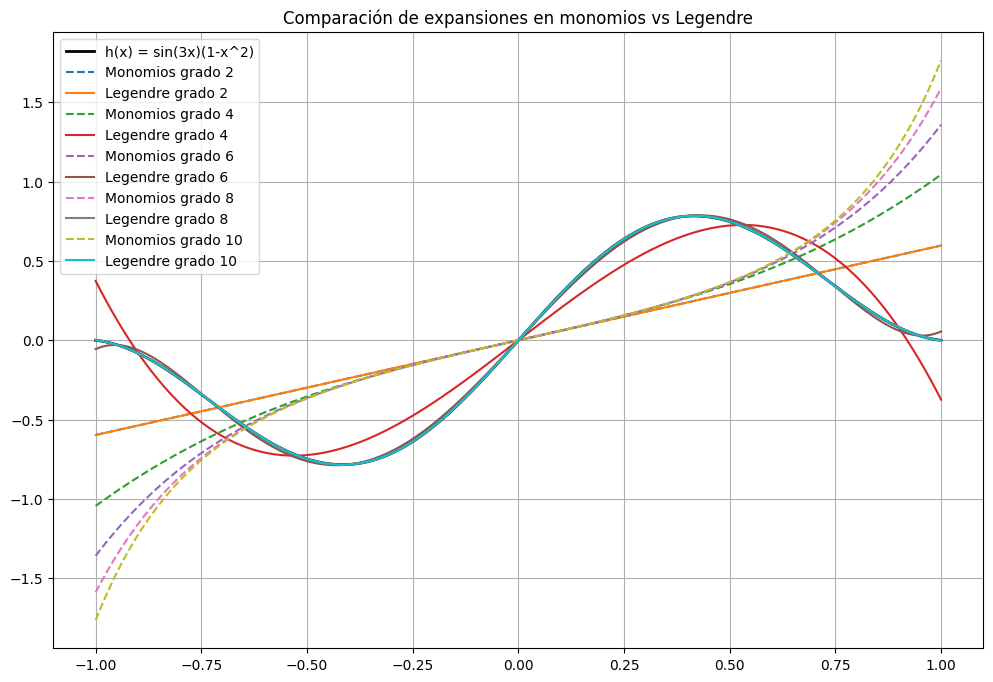

Las expansiones empiezan a diferir a partir de grado 3, con error máximo 1.42e+00


In [153]:
#Aproximaciones numéricas
xx = np.linspace(-1, 1, 400)
hh = sp.lambdify(x, h, "numpy")(xx)

#Suma de la expansión en monomios hasta grado n
def aproximacion_mon(n):
    suma = sum(base1[:n+1])
    return sp.lambdify(x, suma, "numpy")(xx)

#Suma de la expansión en Legendre hasta grado n
def aproximacion_leg(n):
    suma = sum(base2[:n+1])
    return sp.lambdify(x, suma, "numpy")(xx)

#Gráfica comparativa
plt.figure(figsize=(12,8))
plt.plot(xx, hh, "k", lw=2, label="h(x) = sin(3x)(1-x^2)")

for n in [2,4,6,8,10]:
    plt.plot(xx, aproximacion_mon(n), "--", label=f"Monomios grado {n}")
    plt.plot(xx, aproximacion_leg(n), "-",  label=f"Legendre grado {n}")

plt.legend()
plt.title("Comparación de expansiones en monomios vs Legendre")
plt.grid(True)
plt.show()

#Grado en el que difieren
def grado_diferencia(max_n=10, tol=1e-3):
    for n in range(1, max_n+1):
        err = np.max(np.abs(aproximacion_mon(n) - aproximacion_leg(n)))
        if err > tol:
            return n, err
    return None, 0

grado, error = grado_diferencia(10)
print(f"Las expansiones empiezan a diferir a partir de grado {grado}, con error máximo {error:.2e}")

Ejericio II

In [114]:
x = sp.Symbol('x')
a, b = -1, 1
w = sp.sqrt(1 - x**2)

# Definimos el producto interno
def producto_cheb(f, g):
    integrando = sp.lambdify(x, f * g * w, "mpmath")
    return mp.quad(integrando, [a, b])

# Base polinomios de Chebyshev
def base_orto(n):
    base = [x**k for k in range(n+1)] # Definimos la base que queremos ortogonalizar
    orto = []
    for v in base:
        u = v
        for o in orto:
            u -= (producto_cheb(u, o) / producto_cheb(o, o)) * o
        orto.append(sp.simplify(u))
    return orto
orto = base_orto(10)

def base_mon(n):
  monomios = [x**k for k in range(n+1)]
  nueva_base1 = []
  for v in monomios:
        v = (producto_cheb(v,h)/producto_cheb(v,v))*v
        nueva_base1.append(v)
  return nueva_base1

base1 = base_mon(10)

print("función expandida en terminos de la base de monomios")
for i, p in enumerate(base1):
    print(f"p{i}(x) = ", p)
    print()

def base_Chebyshev(n):
  nueva_base3 = []
  for c in orto:
        c = (producto_cheb(c,h)/producto_cheb(c,c))*c
        nueva_base3.append(c)
  return nueva_base3

base3 = base_Chebyshev(10)

print("función expandida en terminos de la base de polinomios de Chebyshev")
for i, p in enumerate(base3):
    print(f"p{i}(x) = ", p)
    print()



función expandida en terminos de la base de monomios
p0(x) =  0.0

p1(x) =  0.824167259347338*x

p2(x) =  0

p3(x) =  0.759515725205885*x**3

p4(x) =  0

p5(x) =  0.589719619283417*x**5

p6(x) =  0

p7(x) =  0.457300710845551*x**7

p8(x) =  0

p9(x) =  0.362407773382737*x**9

p10(x) =  0

función expandida en terminos de la base de polinomios de Chebyshev
p0(x) =  0.0

p1(x) =  0.824167259347338*x

p2(x) =  0

p3(x) =  -2.79575944874928*x*(x**2 - 0.5)

p4(x) =  0

p5(x) =  3.56699444210494*x*(x**4 - 1.0*x**2 + 0.1875)

p6(x) =  0

p7(x) =  -1.62960951315364*x*(x**6 - 1.5*x**4 + 0.625*x**2 - 0.0625)

p8(x) =  0

p9(x) =  0.359153673655444*x*(x**8 - 2.0*x**6 + 1.3125*x**4 - 0.3125*x**2 + 0.01953125)

p10(x) =  0



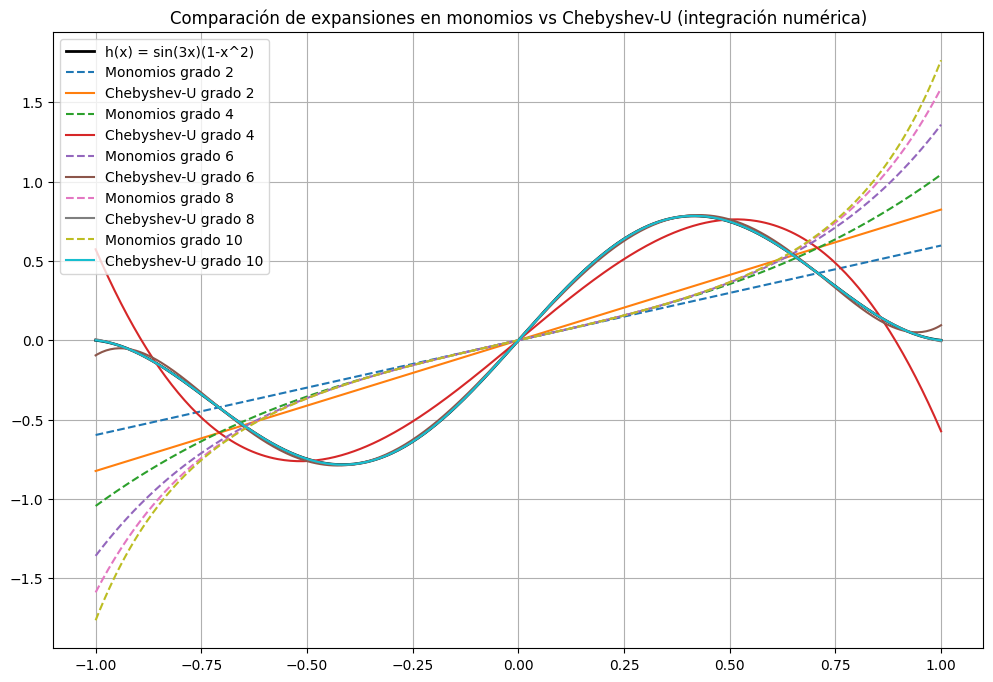

Las expansiones empiezan a diferir a partir de grado 1, con error máximo 2.27e-01


In [117]:

#Aproximaciones numéricas
xx = np.linspace(-1, 1, 400)
hh = sp.lambdify(x, h, "numpy")(xx)

def aproximacion_mon(n):
    suma = sum(base1[:n+1])
    return sp.lambdify(x, suma, "numpy")(xx)

def aproximacion_cheb(n):
    suma = sum(base3[:n+1])
    return sp.lambdify(x, suma, "numpy")(xx)

#Gráfica comparativa
plt.figure(figsize=(12,8))
plt.plot(xx, hh, "k", lw=2, label="h(x) = sin(3x)(1-x^2)")

for n in [2,4,6,8,10]:
    plt.plot(xx, aproximacion_mon(n), "--", label=f"Monomios grado {n}")
    plt.plot(xx, aproximacion_cheb(n), "-",  label=f"Chebyshev-U grado {n}")

plt.legend()
plt.title("Comparación de expansiones en monomios vs Chebyshev-U (integración numérica)")
plt.grid(True)
plt.show()

# Grado en el que difieren
def grado_diferencia(max_n=10, tol=1e-3):
    for n in range(1, max_n+1):
        err = np.max(np.abs(aproximacion_mon(n) - aproximacion_cheb(n)))
        if err > tol:
            return n, err
    return None, 0

grado, error = grado_diferencia(10)
print(f"Las expansiones empiezan a diferir a partir de grado {grado}, con error máximo {error:.2e}")


Ejercicio III

In [123]:
import sympy as sp
import mpmath as mp

# Variable e intervalos
x = sp.Symbol('x')
a, b = -1, 1

# Función a expandir
h = sp.sin(3*x) * (1 - x**2)

#############################################
# Producto interno Legendre (peso = 1)
#############################################
def producto_leg(f, g):
    integrando = sp.lambdify(x, f*g, "mpmath")
    return mp.quad(integrando, [a, b])

# Gram-Schmidt para obtener base ortogonal (Legendre)
def base_legendre_orto(n):
    base = [x**k for k in range(n+1)]
    ort = []
    for v in base:
        u = v
        for o in ort:
            u -= (producto_leg(u, o) / producto_leg(o, o)) * o
        ort.append(sp.simplify(u))
    return ort

# Proyección de h sobre la base de Legendre
def expansion_legendre(n):
    ort = base_legendre_orto(n)
    exp = []
    for p in ort:
        coef = producto_leg(h, p) / producto_leg(p, p)
        exp.append(sp.simplify(coef*p))
    return exp


#############################################
# Producto interno Chebyshev (peso = 1/sqrt(1-x^2))
#############################################
w = 1/sp.sqrt(1 - x**2)

def producto_cheb(f, g):
    integrando = sp.lambdify(x, f*g*w, "mpmath")
    return mp.quad(integrando, [a, b])

# Gram-Schmidt para obtener base ortogonal (Chebyshev)
def base_chebyshev_orto(n):
    base = [x**k for k in range(n+1)]
    ort = []
    for v in base:
        u = v
        for o in ort:
            u -= (producto_cheb(u, o) / producto_cheb(o, o)) * o
        ort.append(sp.simplify(u))
    return ort

# Proyección de h sobre la base de Chebyshev
def expansion_chebyshev(n):
    ort = base_chebyshev_orto(n)
    exp = []
    for p in ort:
        coef = producto_cheb(h, p) / producto_cheb(p, p)
        exp.append(sp.simplify(coef*p))
    return exp


#############################################
# Resultados
#############################################
N = 10  # orden máximo
exp_leg = expansion_legendre(N)
exp_cheb = expansion_chebyshev(N)

print("Expansión en base de polinomios de Legendre:\n")
for i, p in enumerate(exp_leg):
    print(f"L{i}(x) =", p)
print("\n")

print("Expansión en base de polinomios de Chebyshev:\n")
for i, p in enumerate(exp_cheb):
    print(f"T{i}(x) =", p)


Expansión en base de polinomios de Legendre:

L0(x) = 0
L1(x) = 0.597274994151467*x
L2(x) = 0
L3(x) = x*(1.45740963451564 - 2.42901605752607*x**2)
L4(x) = 0
L5(x) = 3.3860356739719*x*(x**4 - 1.11111111111111*x**2 + 0.238095238095238)
L6(x) = 0
L7(x) = x*(-1.58830185678253*x**6 + 2.56571838403332*x**4 - 1.16623562910606*x**2 + 0.12958173656734)
L8(x) = 0
L9(x) = 0.353757691770919*x*(x**8 - 2.11764705882353*x**6 + 1.48235294117647*x**4 - 0.380090497737556*x**2 + 0.0259152612093787)
L10(x) = 0


Expansión en base de polinomios de Chebyshev:

T0(x) = 0
T1(x) = 0.324060840667004*x
T2(x) = 0
T3(x) = x*(1.50031925662797 - 2.00042567607272*x**2)
T4(x) = 0
T5(x) = 3.18133508472247*x*(x**4 - 1.25000000005144*x**2 + 0.312499999914485)
T6(x) = 0
T7(x) = x*(-1.54263728418865*x**6 + 2.69961524712625*x**4 - 1.34980762365945*x**2 + 0.168725952855534)
T8(x) = 0
T9(x) = 0.347887388651589*x*(x**8 - 2.24999999986783*x**6 + 1.68749999980175*x**4 - 0.46874999998625*x**2 + 0.0351562499670302)
T10(x) = 0


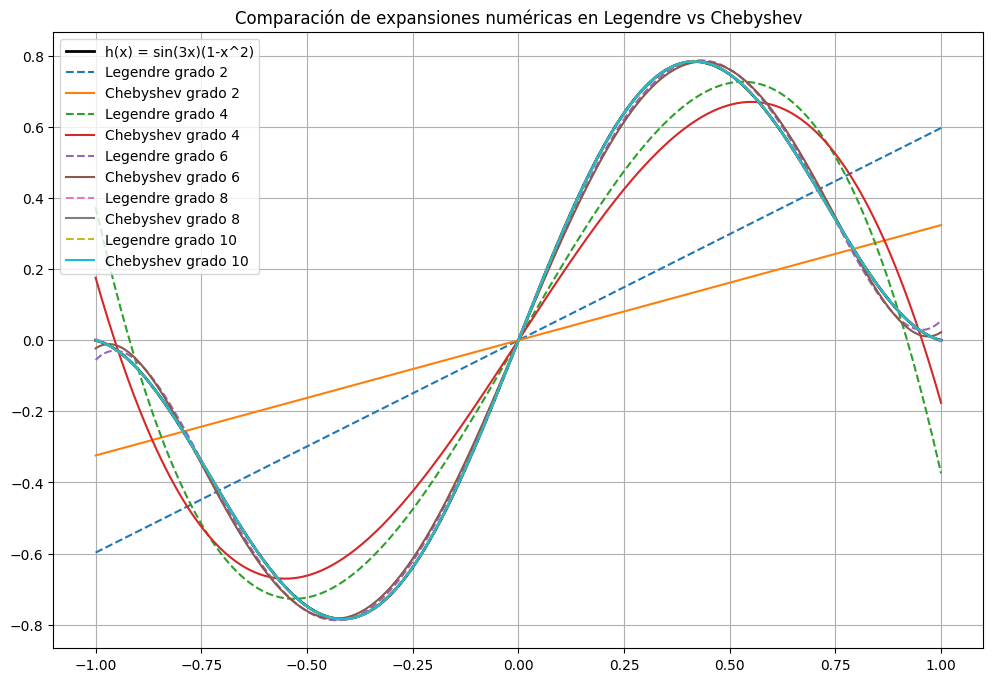

Las expansiones empiezan a diferir a partir de grado 1, con error máximo 2.73e-01


In [154]:
h_num = sp.lambdify(x, h, "numpy")
N = 10
exp_leg = expansion_legendre(N)
exp_cheb = expansion_chebyshev(N)

xx = np.linspace(-1, 1, 400)
hh = h_num(xx)

def aproximacion_leg(n):
    suma = sum(exp_leg[:n+1])
    return sp.lambdify(x, suma, "numpy")(xx)

def aproximacion_cheb(n):
    suma = sum(exp_cheb[:n+1])
    return sp.lambdify(x, suma, "numpy")(xx)

plt.figure(figsize=(12,8))
plt.plot(xx, hh, "k", lw=2, label="h(x) = sin(3x)(1-x^2)")

for n in [2,4,6,8,10]:
    plt.plot(xx, aproximacion_leg(n), "--", label=f"Legendre grado {n}")
    plt.plot(xx, aproximacion_cheb(n), "-",  label=f"Chebyshev grado {n}")

plt.legend()
plt.title("Comparación de expansiones numéricas en Legendre vs Chebyshev")
plt.grid(True)
plt.show()

# ===============================
# 3) Grado en que difieren
# ===============================
def grado_diferencia(max_n=10, tol=1e-3):
    for n in range(1, max_n+1):
        err = np.max(np.abs(aproximacion_leg(n) - aproximacion_cheb(n)))
        if err > tol:
            return n, err
    return None, 0

grado, error = grado_diferencia(10)
print(f"Las expansiones empiezan a diferir a partir de grado {grado}, con error máximo {error:.2e}")



Ejercicio IV

In [142]:
# Proyección de h sobre cada base
def expansion_monomios(n):
    monomios = [x**k for k in range(n+1)]
    nueva_base = []
    for v in monomios:
        coef = producto_leg(h, v) / producto_leg(v, v)
        nueva_base.append(coef*v)
    return nueva_base

def expansion_legendre(n):
    ort = base_legendre_orto(n)
    exp = []
    for p in ort:
        coef = producto_leg(h, p) / producto_leg(p, p)
        exp.append(coef*p)
    return exp

def expansion_chebyshev(n):
    ort = base_chebyshev_orto(n)
    exp = []
    for p in ort:
        coef = producto_cheb(h, p) / producto_cheb(p, p)
        exp.append(coef*p)
    return exp

# Errores de aproximación
def errores_expansion(h, expansion):
    f_func = sp.lambdify(x, h, "mpmath")
    errores = []
    approx = 0
    for term in expansion:
        approx += term
        g_func = sp.lambdify(x, approx, "mpmath")

        integrando = lambda t: (f_func(t) - g_func(t))**2
        err = mp.quad(integrando, [a, b])
        errores.append(float(err))
    return errores

# Resultados
N = 10

exp_m = expansion_monomios(N)
exp_L = expansion_legendre(N)
exp_C = expansion_chebyshev(N)

err_m = errores_expansion(h, exp_m)
err_L = errores_expansion(h, exp_L)
err_C = errores_expansion(h, exp_C)

print("Errores Monomios (0 a 10):", err_m)
print("Errores Legendre (0 a 10):", err_L)
print("Errores Chebyshev (0 a 10):", err_C)


Errores Monomios (0 a 10): [0.5416279359250432, 0.3038029901659532, 0.3038029901659532, 0.46042078843284057, 0.46042078843284057, 0.6123718067689216, 0.6123718067689216, 0.7261799883015452, 0.7261799883015452, 0.8096018421227341, 0.8096018421227341]
Errores Legendre (0 a 10): [0.5416279359250432, 0.3038029901659532, 0.3038029901659532, 0.03408326409877644, 0.03408326409877644, 0.00046933773920535953, 0.00046933773920535953, 1.4623463713707848e-06, 1.4623463713707848e-06, 1.5213777684591825e-09, 1.5213777684591825e-09]
Errores Chebyshev (0 a 10): [0.5416279359250432, 0.3535669726087743, 0.3535669726087743, 0.04296111238701655, 0.04296111238701655, 0.000601839610247842, 0.000601839610247842, 1.8829552790173132e-06, 1.8829552790173132e-06, 1.9605459722486825e-09, 1.9605459722486825e-09]
